In [9]:
import astropy.units as u
from astropy.constants import G
import numpy as np
teff = 3889.717773, 120.745346
rstar = 0.587449, 0.038851
mstar = 0.598864, 0.059886
feh = 0, 0.1
logg = np.log10((G * (mstar[0] * u.solMass)/(rstar[0] * u.solRad)**2).to(u.cm/u.s**2).value)

In [10]:
logg_e = np.log10((G * ((mstar[0] + mstar[1]) * u.solMass)/((rstar[0] + rstar[1])* u.solRad)**2).to(u.cm/u.s**2).value) - logg

In [11]:
logg_e

-0.014232064252201582

In [12]:
import lightkurve as lk

lcf = lk.search_lightcurvefile('K2-43').download()

In [13]:
lcf.hdu[0].header['KEPMAG']

14.887

In [14]:
lcf.ra, lcf.dec

(169.11714, -3.97544)

In [15]:
import threemultis

/Users/ch/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [16]:
import pickle
samples = pickle.load(open('../../threemultis/results/K2-43_samples.p', 'rb'))

lc= pickle.load(open('../../threemultis/results/K2-43.p', 'rb'))

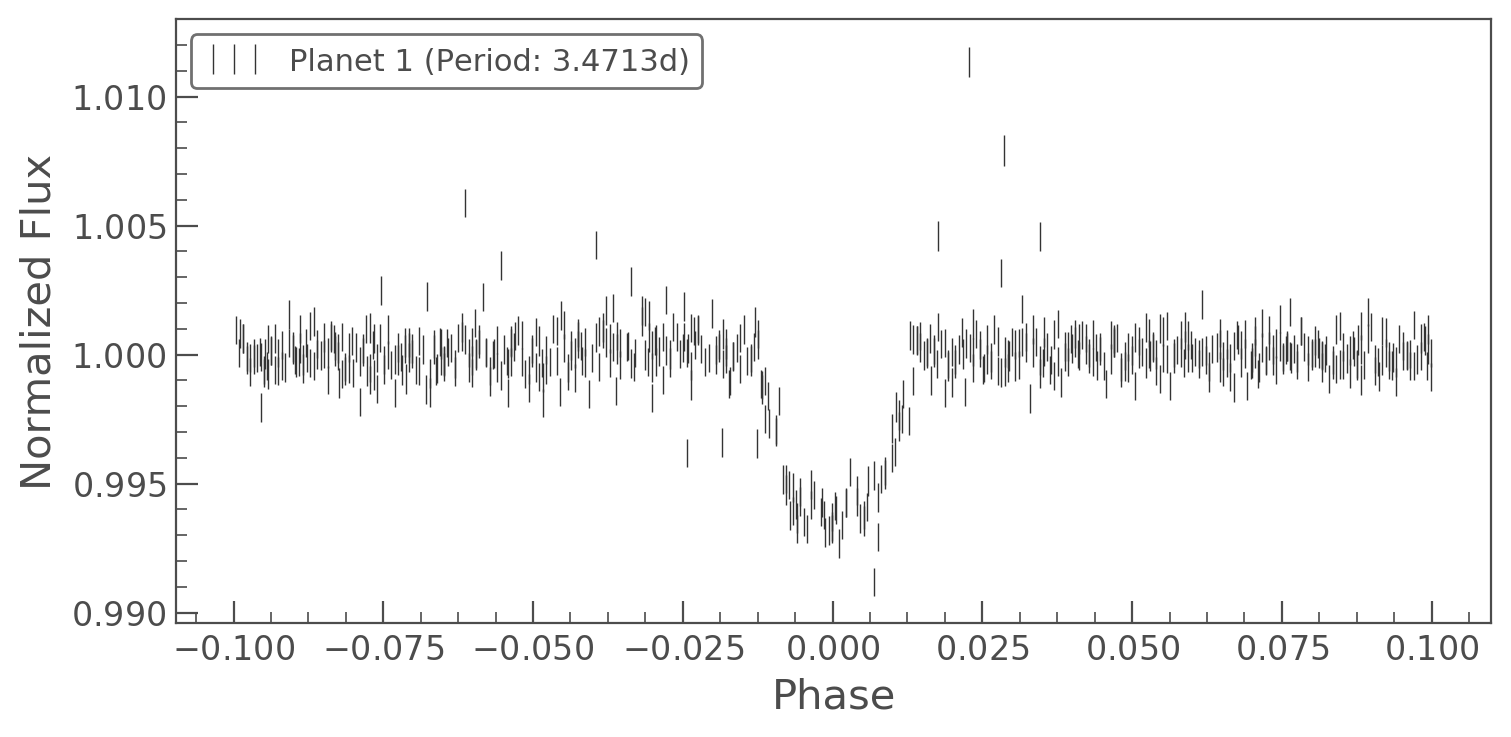

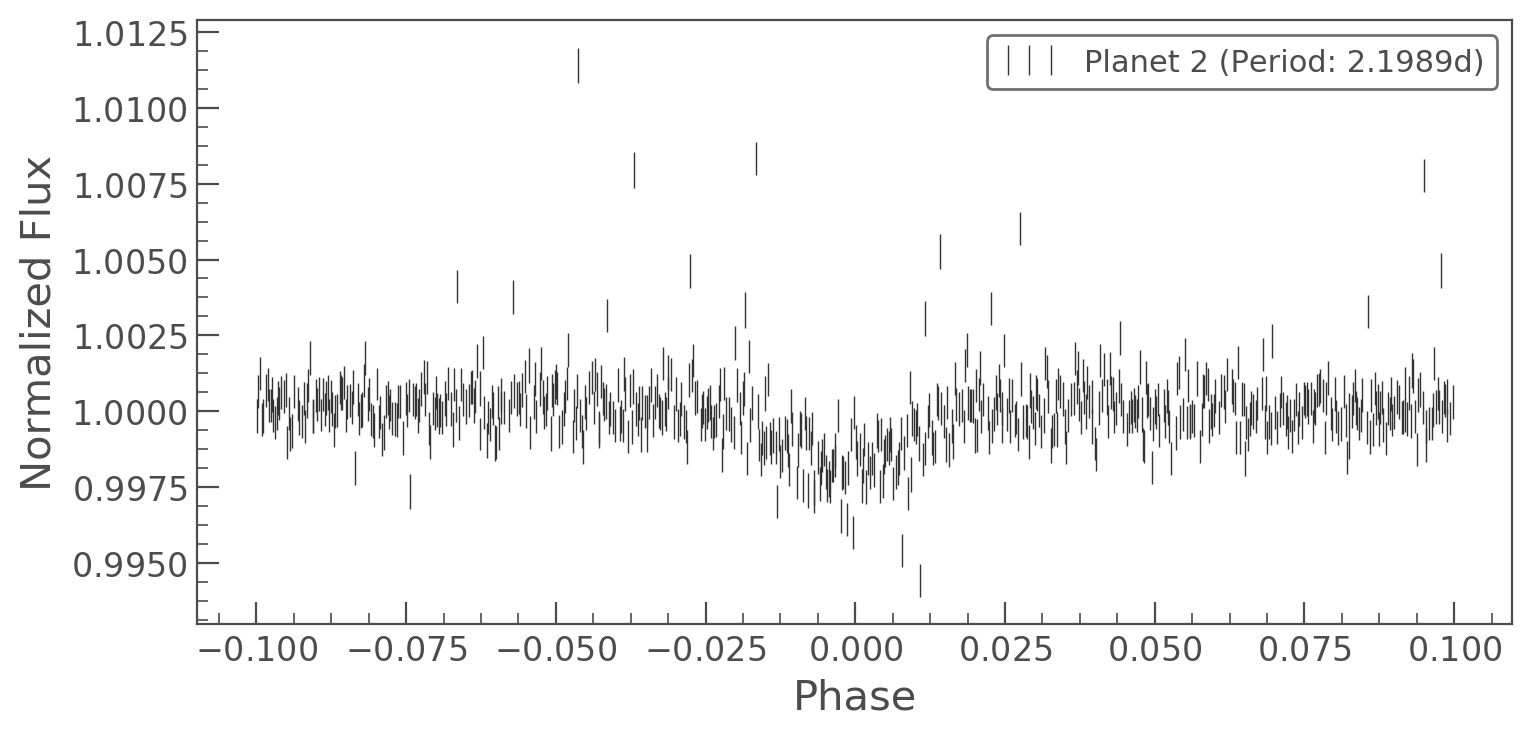

In [19]:
import pandas as pd
params = threemultis.utils.get_params('K2-43')
letters= ['b', 'c', 'd']
for planet, df in params.iterrows():
    otherplanets = list(set(list(np.arange(len(params)))) - set([planet]))
    mask = np.ones(len(lc.time), bool)
    for op in otherplanets:
        p1 = params.loc[op, 'Period']
        t01 = params.loc[op, 'T0']
        d1 = params.loc[op, 'Duration']
        x_fold = (lc.time - t01 + 0.5*p1) % p1 - 0.5*p1
        mask &= (np.abs(x_fold) > d1/2)

    p = df['Period']
    t0 = df['T0']
    d = df['Duration']
    x_fold = (lc.time - t0 + 0.5*p) % p - 0.5*p
    f = lc[mask].fold(p, t0).bin(1)
    k = np.abs(f.phase) < 0.1
    f = f[k]
    f.errorbar(label='Planet {} (Period: {:2.4f}d)'.format(planet + 1, p))

    r = pd.DataFrame(columns=['phase', 'flux', 'flux_err'])
    r['phase'] = f.phase * p
    r['flux'] = f.flux
    r['flux_err'] = f.flux_err
    r.to_csv('{0}/k2-43{0}.csv'.format(letters[planet]), index=None, header=None)

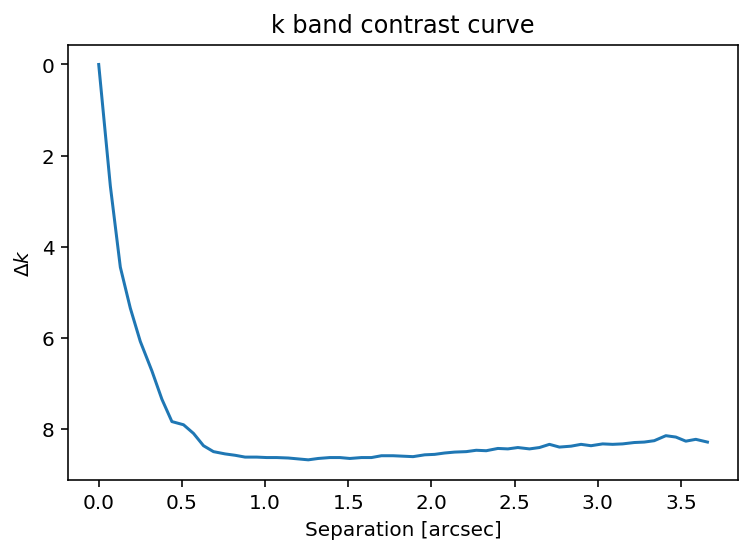

In [8]:
from vespa.stars.contrastcurve import ContrastCurveFromFile
cc = ContrastCurveFromFile('contrast_curve.txt', 'k')
cc.plot()

In [20]:
lc.targetid

201205469